---

# Keras Callbacks (and other things)

In [29]:
import math
import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

In [2]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = keras.layers.Dense(512, activation="relu")(inputs)
    features = keras.layers.Dropout(0.5)(features)
    outputs = keras.layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

### Saving/Loading

The [Save and load Keras models](https://www.tensorflow.org/guide/keras/save_and_serialize) tutorial.


```python
model.save('path/to/location')         # save the full model

model.save_weights('path/to/location') # save only the weights

model = keras.models.load_model('path/to/location')

```

#### The EarlyStopping and ModelCheckpoint callbacks

In [3]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
]

model = get_mnist_model()
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    train_images,
    train_labels,
    epochs=20,
    callbacks=callbacks_list,
    validation_data=(val_images, val_labels),
)

Epoch 1/20


I0000 00:00:1765558221.070991  927820 service.cc:152] XLA service 0x600003e90800 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765558221.071017  927820 service.cc:160]   StreamExecutor device (0): Host, Default Version


 137/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6851 - loss: 1.0299

I0000 00:00:1765558221.482699  928193 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9133 - loss: 0.2932 - val_accuracy: 0.9573 - val_loss: 0.1515
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9543 - loss: 0.1595 - val_accuracy: 0.9651 - val_loss: 0.1186
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9623 - loss: 0.1326 - val_accuracy: 0.9730 - val_loss: 0.1007
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9687 - loss: 0.1118 - val_accuracy: 0.9732 - val_loss: 0.0966
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9720 - loss: 0.1031 - val_accuracy: 0.9771 - val_loss: 0.0882
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9746 - loss: 0.0925 - val_accuracy: 0.9758 - val_loss: 0.0972
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9762 - loss: 0.0884 - val_accuracy: 0.9793 - val_loss: 0.0867
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0830 - val_accurac

In [4]:
model = keras.models.load_model("checkpoint_path.keras")
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.9806 - loss: 0.0791


[0.07908470183610916, 0.9805999994277954]

### LambdaCallback

```python
keras.callbacks.LambdaCallback
```

A template to implement arbitrary functions to be run at various points during training. ([docs](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback))

```python
keras.callbacks.LambdaCallback(
    on_epoch_begin=None,             # add a function to be called there
    on_epoch_end=None,
    on_batch_begin=None,
    on_batch_end=None,
    on_train_begin=None,
    on_train_end=None,
    **kwargs
)
```


- `on_epoch_begin` and `on_epoch_end` expect two positional arguments: epoch, logs
- `on_batch_begin` and `on_batch_end` expect two positional arguments: batch, logs
- `on_train_begin` and `on_train_end` expect one positional argument: logs


In [5]:
# arbitrarily small dataset
train_images_tiny = train_images[:100]
train_labels_tiny = train_labels[:100]

model = get_mnist_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    train_images_tiny,
    train_labels_tiny,
    epochs=2,
    verbose=0,
    batch_size=10,
    callbacks=[
        keras.callbacks.LambdaCallback(
            on_epoch_begin=lambda epoch,logs: print(f"\ton epoch begin, epoch: {epoch}, logs: {logs}"),
            on_epoch_end=lambda epoch,logs: print(f"\ton epoch end,   epoch: {epoch}, logs: {logs}"),
            on_batch_begin=lambda epoch,logs: print(f"\t\ton batch begin, batch: {epoch}, logs: {logs}"),
            on_batch_end=lambda epoch,logs: print(f"\t\ton batch end,   batch: {epoch}, logs: {logs}"),
            on_train_begin=lambda logs: print(f"on train begin, logs: {logs}"),
            on_train_end=lambda logs: print(f"on train end,   logs: {logs}"),
        )
    ]
)

on train begin, logs: {}
	on epoch begin, epoch: 0, logs: {}
		on batch begin, batch: 0, logs: {}
		on batch end,   batch: 0, logs: {'accuracy': 0.10000000149011612, 'loss': 2.5170469284057617}
		on batch begin, batch: 1, logs: {}
		on batch end,   batch: 1, logs: {'accuracy': 0.10000000149011612, 'loss': 2.570406675338745}
		on batch begin, batch: 2, logs: {}
		on batch end,   batch: 2, logs: {'accuracy': 0.20000000298023224, 'loss': 2.393695116043091}
		on batch begin, batch: 3, logs: {}
		on batch end,   batch: 3, logs: {'accuracy': 0.15000000596046448, 'loss': 2.3538074493408203}
		on batch begin, batch: 4, logs: {}
		on batch end,   batch: 4, logs: {'accuracy': 0.18000000715255737, 'loss': 2.3127386569976807}
		on batch begin, batch: 5, logs: {}
		on batch end,   batch: 5, logs: {'accuracy': 0.20000000298023224, 'loss': 2.242591381072998}
		on batch begin, batch: 6, logs: {}
		on batch end,   batch: 6, logs: {'accuracy': 0.2142857164144516, 'loss': 2.173201560974121}
		on batch be

### Learning rate schedules

```python
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
```

([Scheduler docs](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler))  
([Plateau docs](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau))

In [21]:
def scheduler(epoch, lr): # This function keeps the initial learning rate
    if epoch < 10:        # for the first ten epochs
        return lr         # and decreases it
    else:                 # exponentially after that.
        return lr * math.exp(-0.1)

model = keras.models.Sequential([keras.layers.Dense(10)])
model.compile(keras.optimizers.SGD(), loss='mse')
print(f"learning rate at the onset: {model.optimizer.learning_rate.numpy():.2f}")

callback = keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros((5,10)),
                    epochs=15, callbacks=[callback], verbose=0)
print(f"learning rate, 15th epoch:  {model.optimizer.learning_rate.numpy():.5f}")

learning rate at the onset: 0.01
learning rate, 15th epoch:  0.00607


---

# Learning rate schedules

There are many way of decaying (aka *annealing*) your learning rate, the usual variety of approach you get in the field. Many of those schedules are readily available in Keras.

Note that these are usually **not** used with adaptive methods like `RMSprop` or `Adam`, since these do change the effective learning rate automatically. The state of the art is usually achieved with vanilla `SGD` + momentum/nesterov + a decaying learning rate, but because of the difficulty to find the right parameters for those people start with adaptive methods first.

Schedulers can be instantiated and passed to the optimizer like so:

```python
learning_rate = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
opt = keras.optimizers.experimental.SGD(learning_rate=learning_rate)
```

### A Note on Nesterov Momentum

An option that is often used alongside learning rate schedules is **Nesterov momentum**, which comes as an option in various Keras optimizers:

```python
keras.optimizers.experimental.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,     # ← Nesterov momentum
)
```

Nesterov is an attempt to improve on vanilla momentum, using two steps of optimisation instead of just one:

<!-- <img src="images/nesterov.png"> -->
<img src="https://raw.githubusercontent.com/jchwenger/DLWP/main/lectures/04.more/images/nesterov.png">

<small>[What's the difference between momentum based gradient descent and Nesterov's accelerated gradient descent?, Stack Overflow](https://stats.stackexchange.com/a/191727)</small>

- `CosineDecay`: A LearningRateSchedule that uses a cosine decay schedule.
- `CosineDecayRestarts`: A LearningRateSchedule that uses a cosine decay schedule with restarts.
- `ExponentialDecay`: A LearningRateSchedule that uses an exponential decay schedule.
- `InverseTimeDecay`: A LearningRateSchedule that uses an inverse time decay schedule.
- `LearningRateSchedule`: The learning rate schedule base class.
- `PiecewiseConstantDecay`: A LearningRateSchedule that uses a piecewise constant decay schedule.
- `PolynomialDecay`: A LearningRateSchedule that uses a polynomial decay schedule.


The [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) contains the equation for each!

In [25]:
def plot_many_schedules():
    STEPS_PER_EPOCH = 20
    EPOCHS = 1000

    schedules = {
        "CosineDecay": keras.optimizers.schedules.CosineDecay,
        "CosineDecayRestarts": keras.optimizers.schedules.CosineDecayRestarts,
        "ExponentialDecay": keras.optimizers.schedules.ExponentialDecay,
        "InverseTimeDecay": keras.optimizers.schedules.InverseTimeDecay,
        "PiecewiseConstantDecay": keras.optimizers.schedules.PiecewiseConstantDecay,
        "PolynomialDecay": keras.optimizers.schedules.PolynomialDecay,
    }

    steps = np.linspace(0,100000)
    plt.figure(figsize = (8,6))

    for name, schedule in schedules.items():
        if name == "CosineDecay":
            lr_schedule = schedule(
                initial_learning_rate=0.001,
                decay_steps=STEPS_PER_EPOCH*EPOCHS*4,
            )
        elif name == "CosineDecayRestarts":
            lr_schedule = schedule(
                initial_learning_rate=0.001,
                first_decay_steps=STEPS_PER_EPOCH*EPOCHS,
            )
        elif name == "ExponentialDecay":
            lr_schedule = schedule(
                initial_learning_rate=0.001,
                decay_steps=STEPS_PER_EPOCH*EPOCHS,
                decay_rate=0.7,
            )        
        elif name == "InverseTimeDecay":
            lr_schedule = schedule(
                initial_learning_rate=0.001,
                decay_steps=STEPS_PER_EPOCH*EPOCHS,
                decay_rate=1,
            )                
        elif name == "PiecewiseConstantDecay": # use a learning rate that's 1.0 for
            boundaries = [20000, 40000, 60000, 80000]          # the first 100001 steps, 0.5 for the
            values = [0.001, 0.0008, 0.0006, 0.0004, 0.0002]           # next 10000 steps, and 0.1 for any
            lr_schedule = schedule(            # additional steps
                boundaries=boundaries, values=values,
            )            
        elif name == "PolynomialDecay":
            lr_schedule = schedule(
                initial_learning_rate=0.001,
                decay_steps=STEPS_PER_EPOCH*EPOCHS*4,
                end_learning_rate=0.0001,
                power=1.0,
            )
        lr = (
            lr_schedule(steps) if name != "PiecewiseConstantDecay"
            else np.array([lr_schedule(step) for step in steps])
        )
        plt.plot(steps/STEPS_PER_EPOCH, lr, label=name)

    plt.ylim([0,max(plt.ylim())])
    plt.xlabel('Epoch')
    _ = plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()


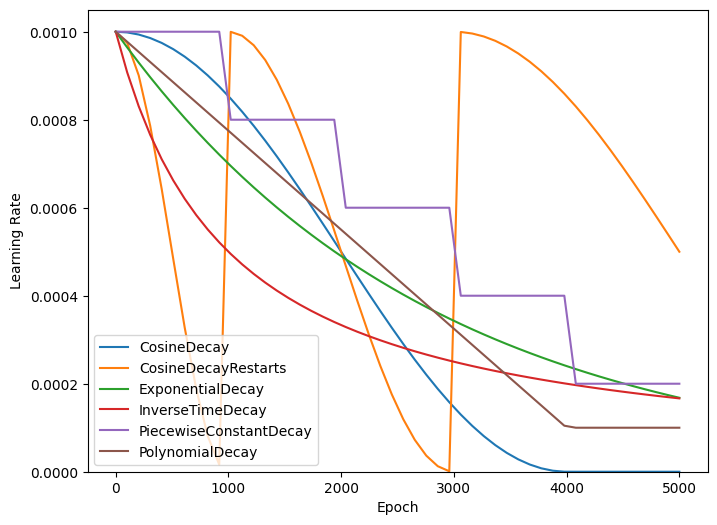

In [26]:
plot_many_schedules()

#### References

[Suki Lau, "Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning", TowardsDataScience](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)

[Learning rate schedule, Peltarion](https://peltarion.com/knowledge-center/modeling-view/run-a-model/optimization-principles-(in-deep-learning)/learning-rate-schedule)

It gets pretty fancy...

[David Landup, "Learning Rate Warmup with Cosine Decay in Keras/TensorFlow"](https://stackabuse.com/learning-rate-warmup-with-cosine-decay-in-keras-and-tensorflow/), inspired by [this repo](https://github.com/Tony607/Keras_Bag_of_Tricks).

#### Note on Adaptive Methods

`RMSProp`, `Adam` and other adaptive methods do not need this so much as the size of the updates are already dynamically changed during the training process.

All these fancy learning rate techniques are usually implemented to make SGD outperform those! In which case you'd search for optimal performance with SGD + Momentum + Schedule + Nesterov!

### Manual implementation of some schedules

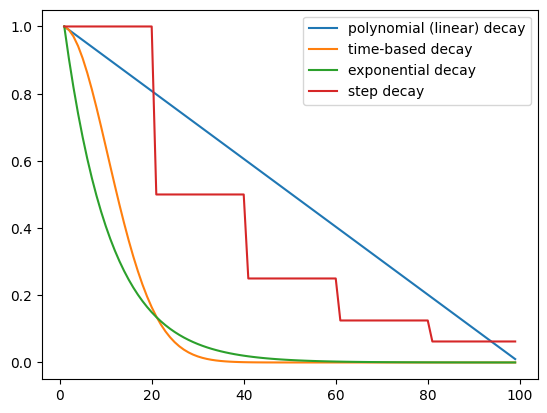

In [27]:
steps = np.arange(1,100)

lr_polynomial_decay = [1.]
decay = 0.95 
power = 1 # linear
for step in steps[:-1]:
    decay = (1 - (step / len(steps))) ** power
    lr_polynomial_decay.append(decay * lr_polynomial_decay[0])

lr_time_based_decay = [1.]
decay = lr_time_based_decay[0]/len(steps)
for step in steps[:-1]:
    lr_time_based_decay.append((lr_time_based_decay[-1] * 1 / (1. + decay * step)))

lr_exponential_decay = [1.]
k = 0.1
for step in steps[:-1]:
    lr_exponential_decay.append(np.exp(-k*step)*lr_exponential_decay[0])

lr_step_decay = [1.]
decay_every = 20
decay = 0.5
for step in steps[:-1]:
    if step % decay_every == 0:
        lr_step_decay.append(decay * lr_step_decay[-1])
    else:
        lr_step_decay.append(lr_step_decay[-1])
    

plt.plot(steps, lr_polynomial_decay, label='polynomial (linear) decay')
plt.plot(steps, lr_time_based_decay, label='time-based decay')
plt.plot(steps, lr_exponential_decay, label='exponential decay')
plt.plot(steps, lr_step_decay, label='step decay')
plt.legend()
plt.show()

See also [Andrew Ng, Learning Rate Decay (C2W2L09)](https://www.youtube.com/watch?v=QzulmoOg2JE)

---

## A GPU Memory callback

This estimates how much memory your model actually uses during the first epoch, and prints it. It is no longer active after that.

In [28]:
def convert_size(size_bytes):
    """Source: https://stackoverflow.com/a/14822210"""
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])
    

class MemoryCallback(keras.callbacks.Callback):
    def __init__(self):
        super(keras.callbacks.Callback, self).__init__() 
    def on_epoch_end(self, epoch, logs=None):
        """Source: https://www.tensorflow.org/api_docs/python/tf/config/experimental/get_memory_info
        `tf.config.experimental.get_memory_info` returns a dict in the form 
        { 'current': <current mem usage>, 'peak': <peak mem usage> }
        """
        if epoch >= 1:
            return        
        if tf.config.list_physical_devices('GPU'):
            c = tf.config.experimental.get_memory_info('GPU:0')
            print()
            msg = f"Memory use, current: {convert_size(c['current'])}, peak: {convert_size(c['peak'])}"
            print("-" * len(msg))
            print(msg)
            print("-" * len(msg))